In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#files=['kdd_timings_kmeans.csv','kdd_error_kmeans.csv','kdd_timings_mini.csv','kdd_error_mini.csv']
files=['click_rate_timing.csv','click_rate_error.csv']

In [12]:
timing_results=pd.read_csv(files[0], index_col=None)
quantizationerror_results=pd.read_csv(files[1], index_col=None)

In [13]:
quantizationerror_results[0:5]

,Unnamed: 0,max_iterations,init_method,cluster_size,values,avg,max,min
0,0,5,k-means++,5,"[39355563236224.508, 39355563236224.508, 39355...",3.935556e+13,3.935556e+13,3.935556e+13
1,1,5,random,5,"[39886249456014.164, 39376527087976.258, 40002...",3.953895e+13,4.007261e+13,3.935556e+13
2,2,10,k-means++,5,"[39355563236224.508, 39355563236224.508, 39355...",3.935556e+13,3.935556e+13,3.935556e+13
3,3,10,random,5,"[39868139987673.906, 39355563236224.508, 39868...",3.949536e+13,3.986814e+13,3.935556e+13
4,4,25,k-means++,5,"[39355563236224.508, 39355563236224.508, 39355...",3.935556e+13,3.935556e+13,3.935556e+13


In [14]:
timing_results[0:5]

,Unnamed: 0,max_iterations,init_method,cluster_size,values,avg,max,min
0,0,5,k-means++,5,"[8.541037797927856, 8.449596881866455, 8.08012...",8.319981,9.819728,7.883541
1,1,5,random,5,"[6.724305152893066, 6.736898899078369, 6.78339...",7.124719,8.685532,6.696623
2,2,10,k-means++,5,"[1.1146800518035889, 0.9375309944152832, 0.940...",0.987780,1.122359,0.927603
3,3,10,random,5,"[0.9296219348907471, 0.9709680080413818, 1.071...",1.100575,1.599077,0.929622
4,4,25,k-means++,5,"[0.943634033203125, 0.9315309524536133, 0.9458...",0.980519,1.296604,0.929901


In [6]:
timing_results_mini=pd.read_csv(files[2], index_col=None)
quantizationerror_results_mini=pd.read_csv(files[3], index_col=None)

In [7]:
timing_results_mini[0:5]

,Unnamed: 0,max_iterations,init_method,cluster_size,values,avg,max,min
0,0,5,k-means++,5,"[1.1065421104431152, 1.0284311771392822, 1.343...",1.093299,1.473436,0.776209
1,1,5,random,5,"[0.8707270622253418, 0.5775110721588135, 0.884...",1.074102,1.650369,0.577511
2,2,10,k-means++,5,"[0.6799571514129639, 0.6544580459594727, 0.511...",0.650498,0.863509,0.499223
3,3,10,random,5,"[0.5058338642120361, 0.74098801612854, 0.57012...",0.731802,0.954144,0.505834
4,4,25,k-means++,5,"[0.5036818981170654, 0.6883888244628906, 0.722...",0.670495,1.050141,0.503682


In [8]:
quantizationerror_results_mini[0:5]

,Unnamed: 0,max_iterations,init_method,cluster_size,values,avg,max,min
0,0,5,k-means++,5,"[39459359811755.781, 40460881084345.992, 39384...",4.015691e+13,4.130484e+13,3.935705e+13
1,1,5,random,5,"[41238609799381.188, 42769062665487.562, 43988...",4.155424e+13,4.407389e+13,3.947318e+13
2,2,10,k-means++,5,"[39356494440957.617, 39921432329922.961, 39356...",3.979398e+13,4.068745e+13,3.935567e+13
3,3,10,random,5,"[40444328086146.078, 41910598119150.297, 43807...",4.080000e+13,4.380704e+13,3.935565e+13
4,4,25,k-means++,5,"[39356325295010.797, 39869078025177.078, 39355...",3.969759e+13,4.037096e+13,3.935582e+13


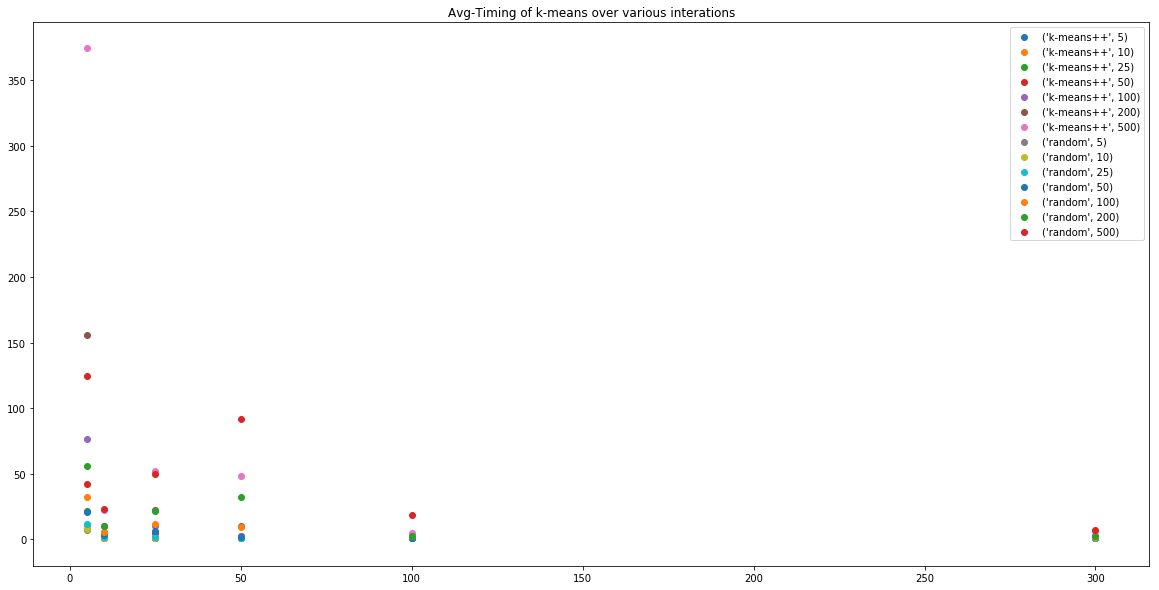

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
for label, df in timing_results.groupby(['init_method','cluster_size']):
    plt.scatter(df['max_iterations'],df['avg'], label=label)
plt.title("Avg-Timing of k-means over various interations")
plt.legend()

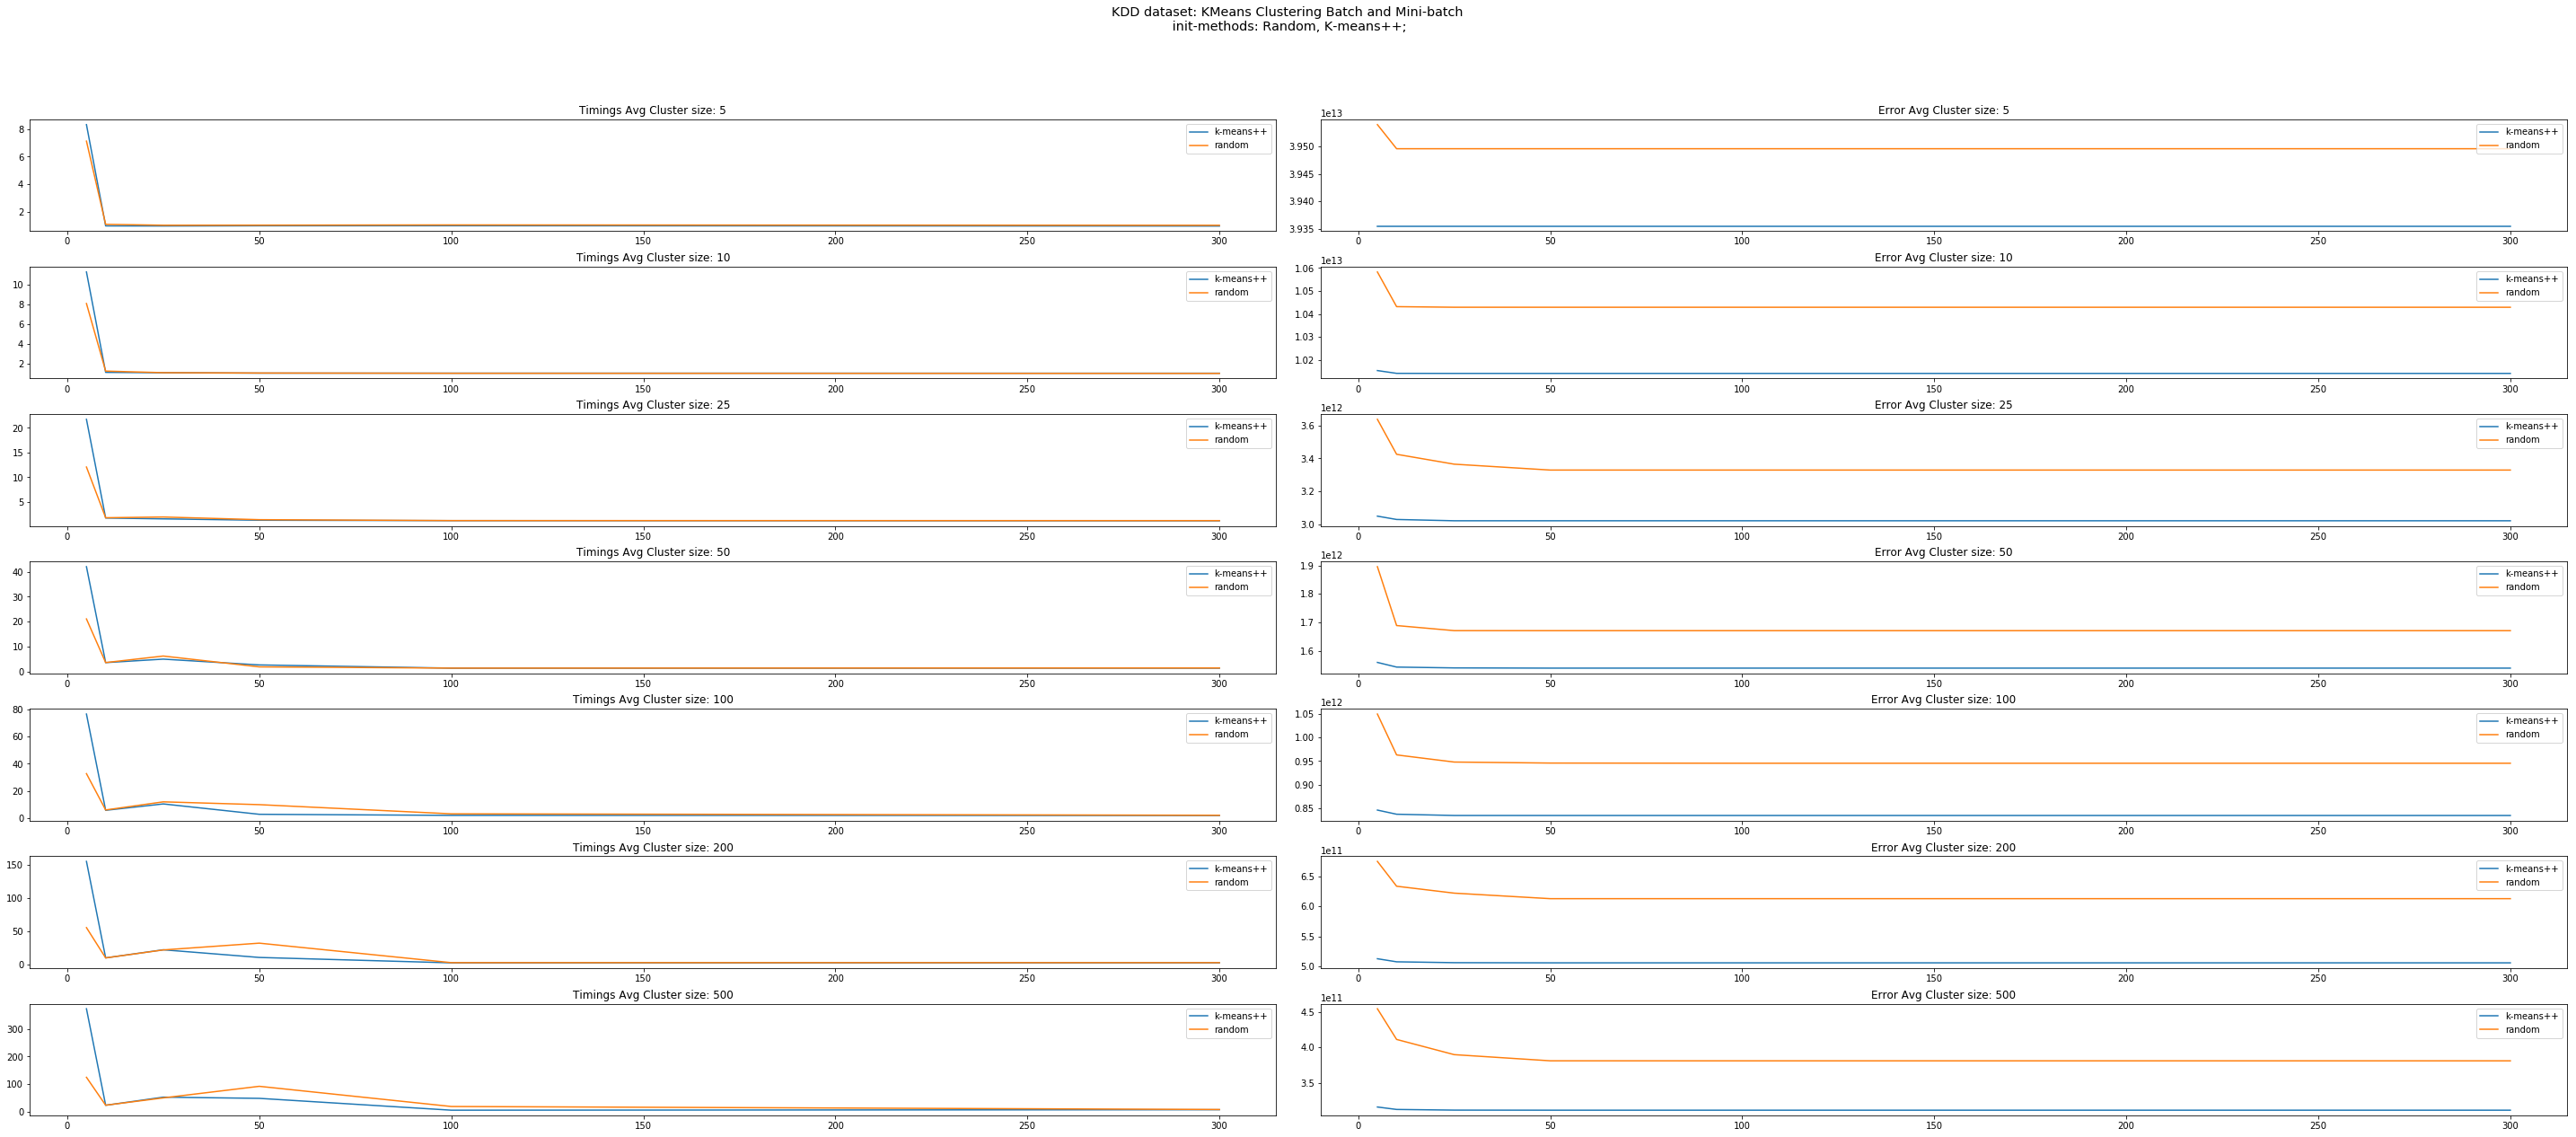

In [17]:
fig=plt.figure(figsize=(40,35))
st = fig.suptitle("KDD dataset: KMeans Clustering Batch and Mini-batch\n init-methods: Random, K-means++;\n ", fontsize="x-large")
i=1
for title, df in timing_results.groupby(['cluster_size']):
    plt.subplot(len(set(timing_results.cluster_size))*2,2,i)
    i+=2;
    for label, df2 in df.groupby(['init_method']):
        plt.plot(df2['max_iterations'],df2['avg'], label=label)
    plt.title("Timings Avg Cluster size: "+ str(title))
    plt.legend(loc=1)
    
# i=1
# for title, df in timing_results_mini.groupby(['cluster_size']):
#     plt.subplot(len(set(timing_results_mini.cluster_size))*2,2,i)
#     i+=2;
#     for label, df2 in df.groupby(['init_method']):
#         plt.plot(df2['max_iterations'],df2['avg'], label='mini-batch'+label)
#     plt.title("Timings Avg Cluster size: "+ str(title))
#     plt.legend(loc=1)
    
i=2
for title, df in quantizationerror_results.groupby(['cluster_size']):
    plt.subplot(len(set(quantizationerror_results.cluster_size))*2,2,i)
    i+=2;
    for label, df2 in df.groupby(['init_method']):
        plt.plot(df2['max_iterations'],df2['avg'], label=label)
        plt.title("Error Avg Cluster size: "+ str(title))
    plt.legend(loc=1)

# i=2
# for title, df in quantizationerror_results_mini.groupby(['cluster_size']):
#     plt.subplot(len(set(quantizationerror_results_mini.cluster_size))*2,2,i)
#     i+=2;
#     for label, df2 in df.groupby(['init_method']):
#         plt.plot(df2['max_iterations'],df2['avg'], label='mini-batch'+label)
#     plt.title("Error Avg Cluster size: "+ str(title))
#     plt.legend(loc=1)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.90)
#fig.savefig("usgs.jpg")

In [10]:
len(set(timing_results.cluster_size))

7